<a href="https://colab.research.google.com/github/jongyoung3/Layout_Analysis_Module/blob/main/LP_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리를 설치합니다.
# Detectron2 설치가 포함되어 있습니다.
# 이 셀 실행 후에는 **반드시 런타임을 재시작**해주세요.

# Detectron2 및 LayoutParser 설치
!pip install -q layoutparser torchvision "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2" "layoutparser[ocr]"

# Tesseract OCR 엔진 설치 (사용하지는 않지만 layoutparser[ocr] 의존성 관련)
!apt-get update -qq
!apt-get install -qq -y tesseract-ocr tesseract-ocr-kor

# 특정 버전의 Pillow 설치 (LayoutParser 호환성 이슈 회피 가능성)
!pip install pillow==9.0.0 --force-reinstall

# 필요시 의존성 버전 조정 (기존 코드 유지)
!pip install --upgrade google-api-core==2.15.0
!pip install --upgrade protobuf==5.0.0

print("---" * 10)
print("설치가 완료되었습니다.")
print("!!! 중요: 다음 셀을 실행하기 전에 [런타임] -> [런타임 다시 시작] 메뉴를 클릭하여 런타임을 재시작하세요. !!!")
print("---" * 10)

# 설치 확인 (선택 사항)
!pip list | grep -E 'torch|detectron2|layoutparser'
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.34.1
    Uninstalling google-api-core-1.34.1:
      Successfully uninstalled google-api-core-1.34.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-vision 1.0.0 requires google-api-core[grpc]<2.0.0dev,>=1.14.0, but you have google-api-core 2.15.0 which is incompatible.
google-cloud-bigtable 2.30.1 requires google-api-core[grpc]<3.0.0,>=2.16.0, but you have google-api-core 2.15.0 which is incompatible.
google-spark-connect 0.5.2 requires google-api-core>=2.19.1, but you have google-api-core 2.15.0 which is incompatible.


ERROR: Ignored the following yanked versions: 3.18.0, 4.0.0rc1, 4.0.0rc2, 4.21.0, 5.29.0
ERROR: Could not find a version that satisfies the requirement protobuf==5.0.0 (from versions: 2.0.0b0, 2.0.3, 2.3.0, 2.4.1, 2.5.0, 2.6.0, 2.6.1, 3.0.0a2, 3.0.0a3, 3.0.0b1, 3.0.0b1.post1, 3.0.0b1.post2, 3.0.0b2, 3.0.0b2.post1, 3.0.0b2.post2, 3.0.0b3, 3.0.0b4, 3.0.0, 3.1.0, 3.1.0.post1, 3.2.0rc1, 3.2.0rc1.post1, 3.2.0rc2, 3.2.0, 3.3.0, 3.4.0, 3.5.0.post1, 3.5.1, 3.5.2, 3.5.2.post1, 3.6.0, 3.6.1, 3.7.0rc2, 3.7.0rc3, 3.7.0, 3.7.1, 3.8.0rc1, 3.8.0, 3.9.0rc1, 3.9.0, 3.9.1, 3.9.2, 3.10.0rc1, 3.10.0, 3.11.0rc1, 3.11.0rc2, 3.11.0, 3.11.1, 3.11.2, 3.11.3, 3.12.2, 3.12.4, 3.13.0rc3, 3.13.0, 3.14.0rc1, 3.14.0rc2, 3.14.0rc3, 3.14.0, 3.15.0rc1, 3.15.0rc2, 3.15.0, 3.15.1, 3.15.2, 3.15.3, 3.15.4, 3.15.5, 3.15.6, 3.15.7, 3.15.8, 3.16.0rc1, 3.16.0rc2, 3.16.0, 3.17.0rc1, 3.17.0rc2, 3.17.0, 3.17.1, 3.17.2, 3.17.3, 3.18.0rc1, 3.18.0rc2, 3.18.1, 3.18.3, 3.19.0rc1, 3.19.0rc2, 3.19.0, 3.19.1, 3.19.2, 3.19.3, 3.19.4, 3.19

In [1]:
# **라이브러리 임포트 및 Google Drive 연결**
#
# 필요한 Python 라이브러리를 가져오고 Google Drive에 접근하기 위해 마운트합니다.

import os
import cv2
import layoutparser as lp
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import logging # 로깅 추가

# Tesseract OCR 기본 설정 확인
!tesseract --version
!tesseract --list-langs

# OCR 처리를 위한 라이브러리 임포트
import pytesseract
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm  # 진행 상태 표시용

# Tesseract 설정 (필요시 경로 변경)
pytesseract.pytesseract.tesseract_cmd = 'tesseract'

print("-" * 30)
print("Tesseract OCR 엔진 설치 완료")
print("-" * 30)

# 로깅 설정 (오류 및 정보 확인용)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Google Drive 마운트
try:
    drive.mount('/content/drive')
    logging.info("Google Drive 마운트 성공.")
except Exception as e:
    logging.error(f"Google Drive 마운트 실패: {e}")
    logging.warning("Google Drive를 사용하지 않는 경우 이 메시지는 무시해도 됩니다.")

print("-" * 30)
print("라이브러리 임포트 및 Google Drive 마운트 시도 완료.")
print("-" * 30)

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8
List of available languages (3):
eng
kor
osd
------------------------------
Tesseract OCR 엔진 설치 완료
------------------------------
Mounted at /content/drive
------------------------------
라이브러리 임포트 및 Google Drive 마운트 시도 완료.
------------------------------


In [25]:
# **설정**
#
# 분석할 이미지 파일의 경로를 지정합니다.
# Google Drive 경로를 사용하거나, Colab에 직접 파일을 업로드한 후 경로를 수정하세요.

# --- 사용자 설정 영역 ---
# 비교 분석할 이미지 경로를 지정하세요.
# 예: 논문 이미지 경로
# IMAGE_PATH = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/paper_example.pdf" # PDF는 안됩니다. PNG/JPG 등으로 변환 필요
#IMAGE_PATH = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/논문.jpg" # <--- 분석할 이미지 파일 경로로 수정하세요! (PNG, JPG 등)
# 예: 학습지 이미지 경로
IMAGE_PATH = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/학습지.jpeg"

# 모델 로드 시 사용할 신뢰도 임계값 (필요시 조절)
# 두 모델에 동일한 임계값을 사용하거나, 각 모델에 맞게 다르게 설정할 수 있습니다.
MODEL_SCORE_THRESH = 0.5
# --- 사용자 설정 영역 끝 ---

# 경로 존재 확인
if not os.path.exists(IMAGE_PATH):
    logging.error(f"지정된 이미지 경로를 찾을 수 없습니다: {IMAGE_PATH}")
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다. Google Drive 경로 또는 Colab 업로드 경로를 확인하세요: {IMAGE_PATH}")
else:
    logging.info(f"이미지 경로 확인: {IMAGE_PATH}")

print("-" * 30)
print(f"분석 대상 이미지: {IMAGE_PATH}")
print("-" * 30)

------------------------------
분석 대상 이미지: /content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/학습지.jpeg
------------------------------


In [26]:
# **이미지 로드**
#
# 지정된 경로에서 이미지를 로드하고 색상 채널(BGR -> RGB)만 변환합니다.
# 복잡한 이미지 전처리 단계는 제거되었습니다.

image = cv2.imread(IMAGE_PATH)

if image is None:
    logging.error(f"이미지를 로드할 수 없습니다: {IMAGE_PATH}")
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없거나 읽을 수 없습니다. 경로를 확인하세요: {IMAGE_PATH}")
else:
    logging.info("이미지 로드 성공.")
    # BGR -> RGB 변환 (matplotlib, layoutparser 시각화는 RGB 기반)
    image_rgb = image[..., ::-1]
    logging.info("이미지 색상 채널을 BGR에서 RGB로 변환했습니다.")
    h, w = image_rgb.shape[:2]
    logging.info(f"이미지 크기: 너비={w}, 높이={h}")

print("-" * 30)
print("이미지 로드 및 기본 색상 변환 완료.")
print("-" * 30)

# 원본 이미지 표시 (선택 사항)
# plt.figure(figsize=(10, 10))
# plt.imshow(image_rgb)
# plt.title("원본 이미지")
# plt.axis('off')
# plt.show()

------------------------------
이미지 로드 및 기본 색상 변환 완료.
------------------------------


In [27]:
# **레이아웃 감지 모델 로드 (PubLayNet Mask R-CNN 및 Faster R-CNN)**
#
# 비교를 위해 두 가지 PubLayNet 모델을 로드합니다.

# PubLayNet 레이블 맵 정의 (두 모델 공통)
# 0: Text, 1: Title, 2: List, 3: Table, 4: Figure
publaynet_label_map = {0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}

model_maskrcnn = None
model_fasterrcnn = None

# 1. PubLayNet Mask R-CNN 모델 로드
try:
    logging.info("PubLayNet Mask R-CNN 모델 로드 시도 중...")
    model_maskrcnn = lp.Detectron2LayoutModel(
        'lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config', # Mask R-CNN 모델 경로
        extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", MODEL_SCORE_THRESH],
        label_map=publaynet_label_map
    )
    logging.info("PubLayNet Mask R-CNN 모델 로드 성공!")
except Exception as e:
    logging.error(f"PubLayNet Mask R-CNN 모델 로드 실패: {e}")
    # 필요시 에러 처리 추가

# 2. PubLayNet Faster R-CNN 모델 로드
try:
    logging.info("PubLayNet Faster R-CNN 모델 로드 시도 중...")
    model_fasterrcnn = lp.Detectron2LayoutModel(
        'lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', # Faster R-CNN 모델 경로
        extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", MODEL_SCORE_THRESH],
        label_map=publaynet_label_map
    )
    logging.info("PubLayNet Faster R-CNN 모델 로드 성공!")
except Exception as e:
    logging.error(f"PubLayNet Faster R-CNN 모델 로드 실패: {e}")
    # 필요시 에러 처리 추가

# 최종 모델 로드 확인
if model_maskrcnn is None or model_fasterrcnn is None:
    raise RuntimeError("하나 이상의 레이아웃 감지 모델 로드에 실패했습니다. 인터넷 연결 및 라이브러리 설치 상태를 확인하세요.")

print("-" * 30)
print("PubLayNet Mask R-CNN 및 Faster R-CNN 모델 로드 완료.")
print("-" * 30)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


------------------------------
PubLayNet Mask R-CNN 및 Faster R-CNN 모델 로드 완료.
------------------------------


In [28]:
# **레이아웃 감지 실행 (두 모델)**
#
# 로드된 두 모델을 사용하여 원본 이미지에서 레이아웃 요소를 감지합니다.

logging.info("레이아웃 감지 시작 (Mask R-CNN)...")
layout_maskrcnn = model_maskrcnn.detect(image_rgb)
logging.info(f"Mask R-CNN 감지 완료: 총 {len(layout_maskrcnn)}개 레이아웃 요소 감지됨.")

logging.info("레이아웃 감지 시작 (Faster R-CNN)...")
layout_fasterrcnn = model_fasterrcnn.detect(image_rgb)
logging.info(f"Faster R-CNN 감지 완료: 총 {len(layout_fasterrcnn)}개 레이아웃 요소 감지됨.")

print("-" * 30)
print("두 모델에 대한 레이아웃 감지 완료.")
print("-" * 30)

------------------------------
두 모델에 대한 레이아웃 감지 완료.
------------------------------


<ipython-input-29-e23548828cd3>:61: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, bbox_inches='tight', dpi=200)
<ipython-input-29-e23548828cd3>:61: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, bbox_inches='tight', dpi=200)
<ipython-input-29-e23548828cd3>:61: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, bbox_inches='tight', dpi=200)
<ipython-input-29-e23548828cd3>:61: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, bbox_inches='tight', dpi=200)
<ipython-input-29-e23548828cd3>:61: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, bbox_inches='tight', dpi=200)
<ipython-input-29-e23548828cd3>:61: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.

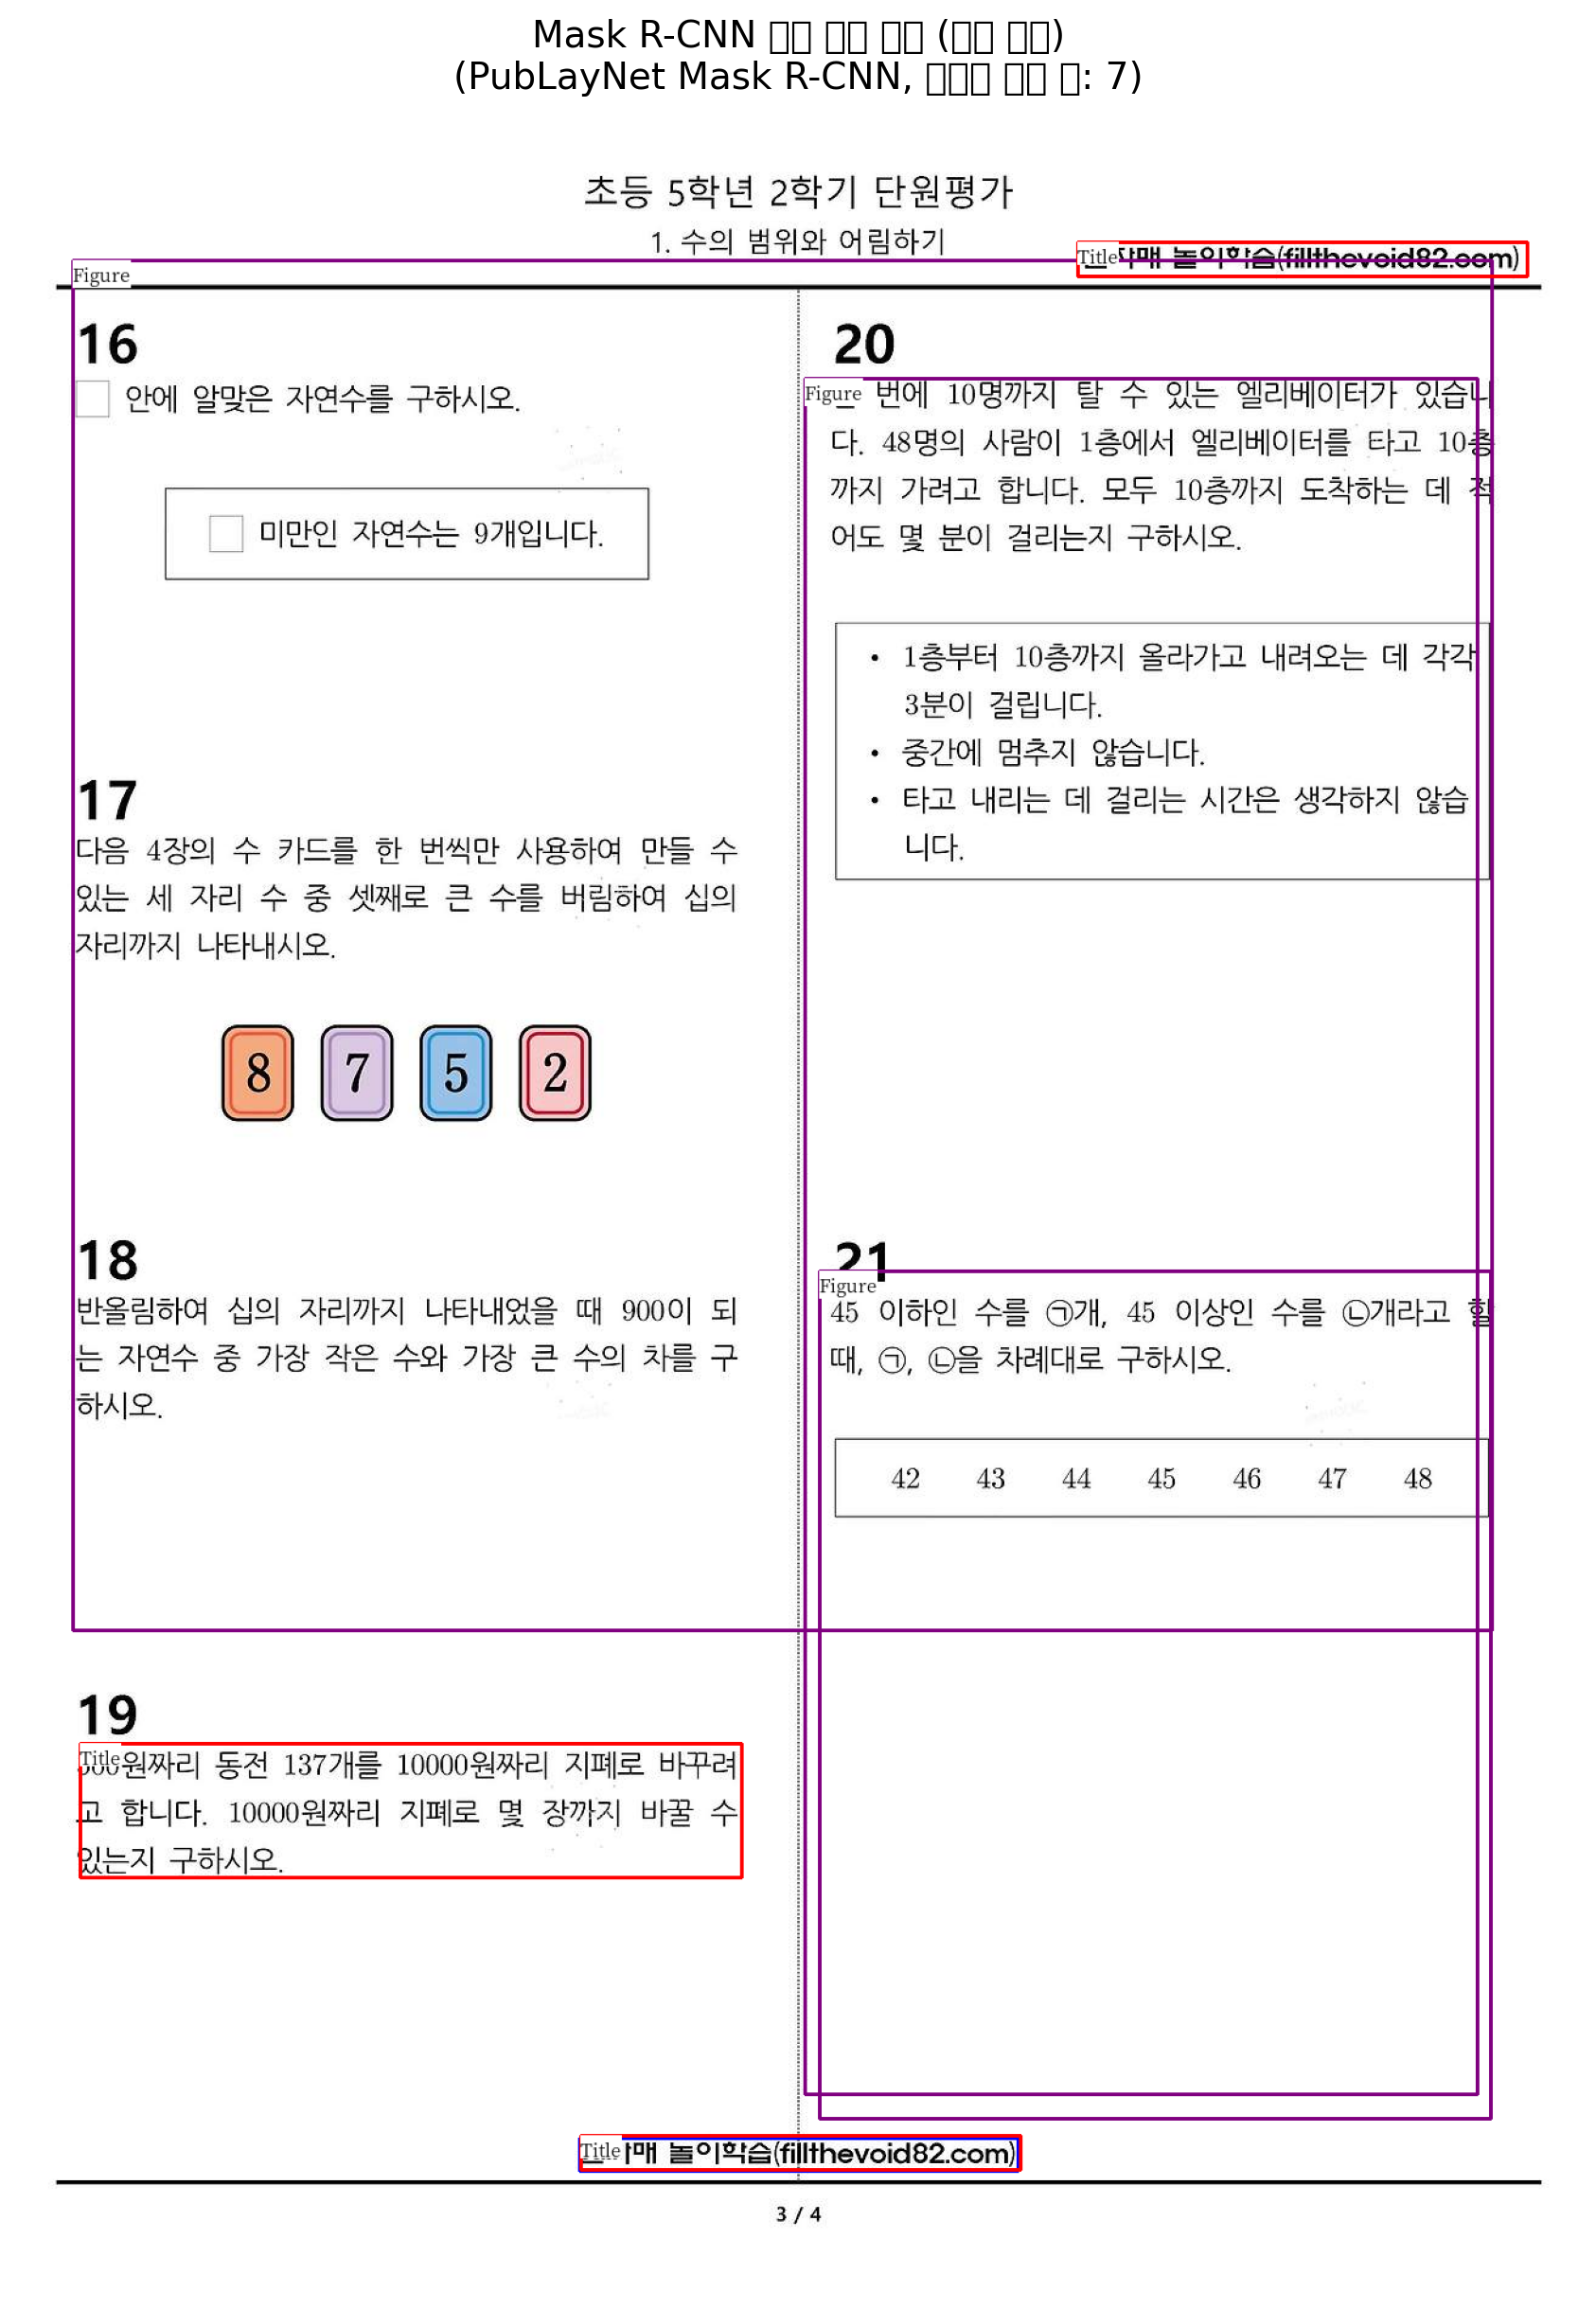

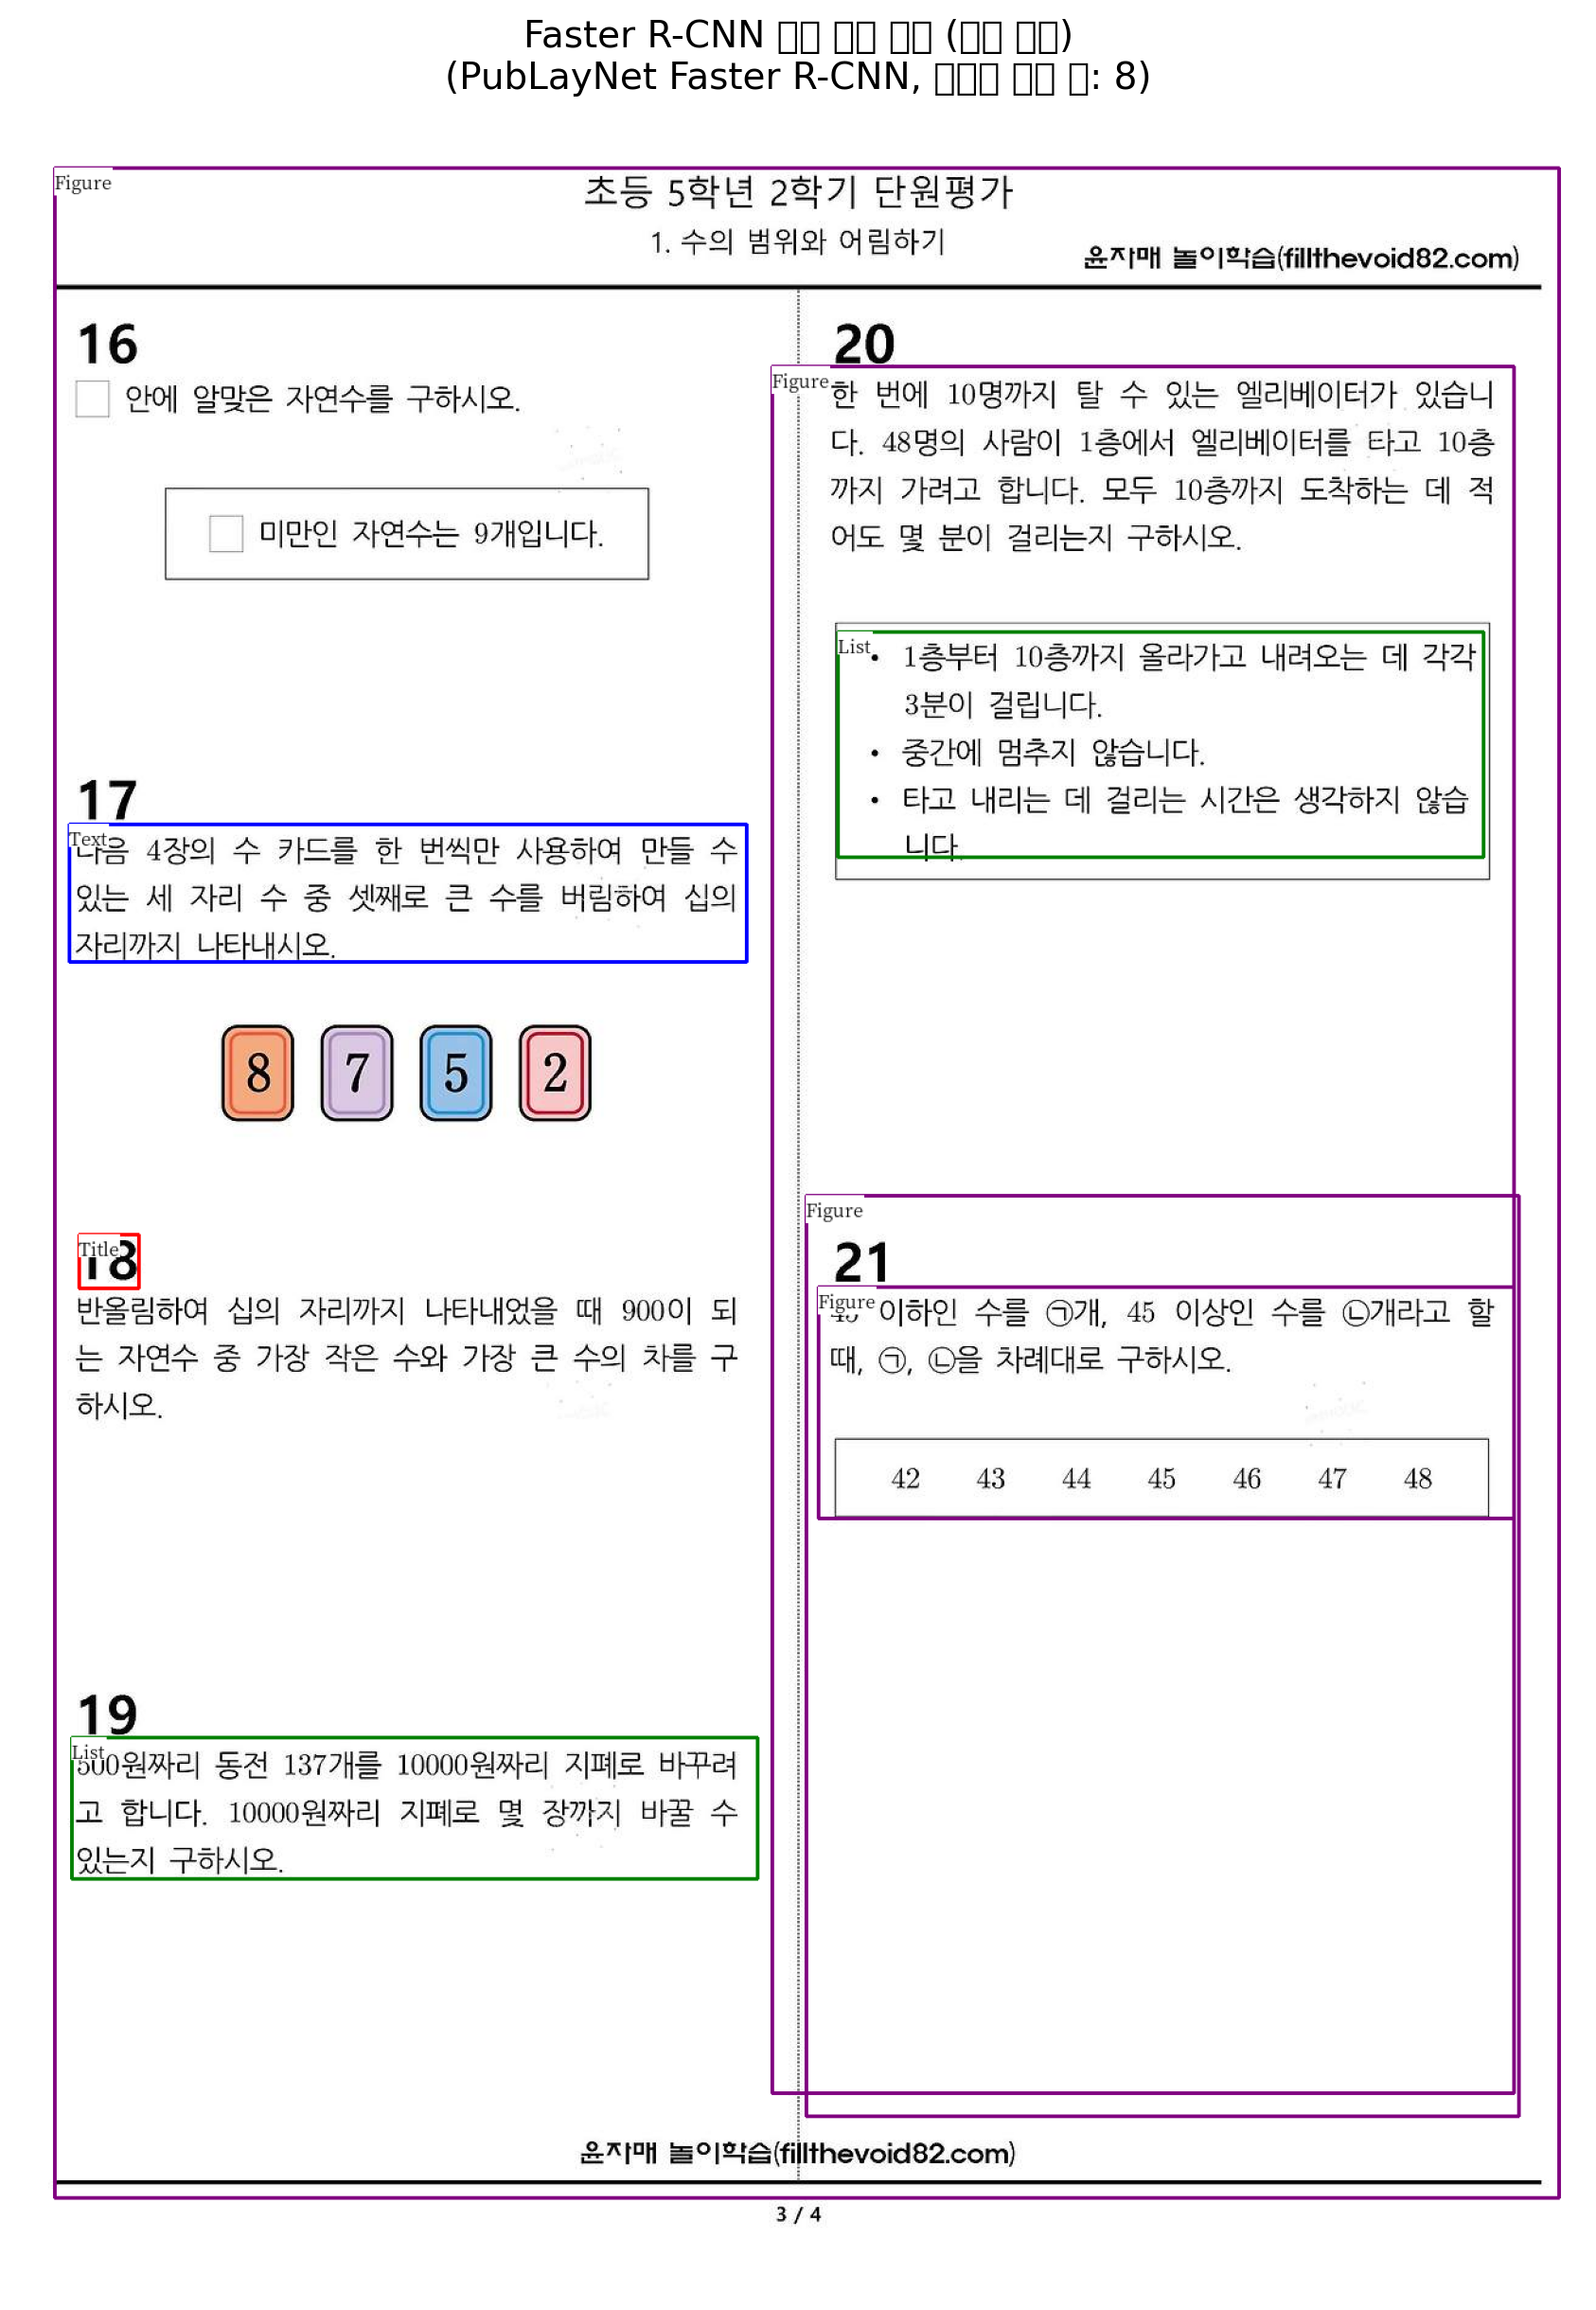

------------------------------
모델별 결과 시각화 및 이미지 저장이 완료되었습니다. 저장 위치: /content/drive/MyDrive/layout_results
------------------------------


In [29]:
# **결과 시각화 및 이미지 저장 (모델별 비교 - 색상 구분 적용, 수정됨)**
#
# 두 모델의 레이아웃 감지 결과를 각각 시각화하고,
# 그 결과를 이미지 파일로 저장합니다. 레이블 종류별로 다른 색상을 사용합니다.

import matplotlib.pyplot as plt
import os

# --- 사용자 설정: 이미지 저장 경로 및 파일명 ---
# 이미지를 저장할 폴더 경로를 지정하세요. Google Drive 경로 등을 사용할 수 있습니다.
# 폴더가 없다면 자동으로 생성됩니다.
SAVE_DIR = "/content/drive/MyDrive/layout_results" # 예시: Google Drive 내 폴더
# 저장될 파일의 기본 이름 (모델명이 추가됩니다)
BASE_FILENAME = os.path.splitext(os.path.basename(IMAGE_PATH))[0] # 원본 파일명 기반

# 저장될 파일 경로 설정
MASKRCNN_SAVE_PATH = os.path.join(SAVE_DIR, f"{BASE_FILENAME}_MaskRCNN_layout_colored.png")
FASTERRCNN_SAVE_PATH = os.path.join(SAVE_DIR, f"{BASE_FILENAME}_FasterRCNN_layout_colored.png")

# 저장 디렉토리 생성 (없으면)
os.makedirs(SAVE_DIR, exist_ok=True)
logging.info(f"결과 이미지를 저장할 디렉토리: {SAVE_DIR}")
# --- 사용자 설정 끝 ---

# --- 레이블별 색상 지정 ---
# PubLayNet 모델의 기본 레이블에 대한 색상 매핑 정의
publaynet_color_map = {
    "Text": "blue",
    "Title": "red",
    "List": "green",
    "Table": "darkorange",
    "Figure": "purple"
}
logging.info(f"사용할 레이블 색상 맵: {publaynet_color_map}")
# --- 색상 지정 끝 ---


# 시각화 및 저장 함수 정의
def visualize_and_save_layout(image, layout, model_name, title, save_path, color_map_dict): # 인자 이름 변경 color_map -> color_map_dict
    """레이아웃을 시각화하고 지정된 경로에 이미지 파일로 저장하는 함수 (색상 맵 적용)"""
    if layout is None or len(layout) == 0:
        logging.warning(f"{model_name} 결과가 없어 시각화 및 저장을 건너<0xEB><0x9B><0x84>니다.")
        return

    logging.info(f"{model_name} 결과 시각화 및 저장 중... -> {save_path}")
    plt.figure(figsize=(18, 15), dpi=200)

    # draw_box 호출 시 올바른 인자 이름 'color_map' 사용!
    vis_image = lp.draw_box(image.copy(), layout,
                            box_width=3,
                            show_element_type=True,
                            show_element_id=False,
                            color_map=color_map_dict # <<<--- 여기가 수정된 부분! (box_color_map -> color_map)
                           )
    plt.imshow(vis_image)
    plt.title(f"{title}\n({model_name}, 감지된 객체 수: {len(layout)})", fontsize=14)
    plt.axis('off')

    # 파일 저장
    try:
        plt.savefig(save_path, bbox_inches='tight', dpi=200)
        logging.info(f"이미지 저장 완료: {save_path}")
    except Exception as e:
        logging.error(f"이미지 저장 실패 ({save_path}): {e}")

    plt.show()
    plt.close()


# 1. Mask R-CNN 결과 시각화 및 저장 (색상 맵 적용)
visualize_and_save_layout(image_rgb, layout_maskrcnn,
                          "PubLayNet Mask R-CNN", "Mask R-CNN 모델 감지 결과 (색상 구분)",
                          MASKRCNN_SAVE_PATH,
                          publaynet_color_map) # 색상 맵 딕셔너리 전달

# 2. Faster R-CNN 결과 시각화 및 저장 (색상 맵 적용)
visualize_and_save_layout(image_rgb, layout_fasterrcnn,
                          "PubLayNet Faster R-CNN", "Faster R-CNN 모델 감지 결과 (색상 구분)",
                          FASTERRCNN_SAVE_PATH,
                          publaynet_color_map) # 색상 맵 딕셔너리 전달

print("-" * 30)
print(f"모델별 결과 시각화 및 이미지 저장이 완료되었습니다. 저장 위치: {SAVE_DIR}")
print("-" * 30)

In [30]:
import os
import json
import xml.etree.ElementTree as ET
import glob # 파일 목록 가져오기 위해 사용

# --- 설정 ---
# GT XML 파일들이 있는 디렉토리
XML_DIR = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/GT_sample"
# 원본 이미지 파일들이 있는 디렉토리 (XML과 파일 이름이 같다고 가정)
# 이미지 크기를 XML에서 읽어오므로, 실제 이미지 파일 접근은 필수는 아님
# IMAGE_DIR = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/" # 필요시 사용
# 출력될 COCO JSON 파일 경로
OUTPUT_JSON_PATH = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/annotations_coco.json"

# 클래스 목록 및 ID 매핑 (ID는 0부터 시작)
CLASSES = ["Text", "Title", "List", "Table", "Figure"]
category_map = {name: i for i, name in enumerate(CLASSES)}
# --- 설정 끝 ---

def xml_to_coco(xml_dir, output_json_path, classes, category_map):
    """Pascal VOC XML 주석을 COCO JSON 형식으로 변환합니다."""

    coco_data = {
        "info": {"description": "Custom Layout Dataset", "version": "1.0", "year": 2024},
        "licenses": [], # 라이선스 정보는 비워둠
        "images": [],
        "annotations": [],
        "categories": []
    }

    # 카테고리 정보 채우기
    for name, cat_id in category_map.items():
        coco_data['categories'].append({
            "supercategory": "layout", # 상위 카테고리 (임의 지정 가능)
            "id": cat_id,
            "name": name
        })

    annotation_id_counter = 0
    image_id_counter = 0
    xml_files = glob.glob(os.path.join(xml_dir, '*.xml'))

    print(f"Found {len(xml_files)} XML files in {xml_dir}")

    for xml_file in xml_files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()

            filename_node = root.find('filename')
            if filename_node is None:
                logging.warning(f"Skipping {xml_file}: <filename> tag not found.")
                continue
            image_filename = filename_node.text

            size_node = root.find('size')
            if size_node is None:
                 logging.warning(f"Skipping {xml_file}: <size> tag not found.")
                 continue
            try:
                width = int(size_node.find('width').text)
                height = int(size_node.find('height').text)
            except (ValueError, TypeError, AttributeError) as e:
                logging.warning(f"Skipping {xml_file}: Error parsing image size - {e}")
                continue

            # 이미지 정보 추가
            image_info = {
                "id": image_id_counter,
                "file_name": image_filename,
                "width": width,
                "height": height,
                "license": None, # 라이선스 정보 없음
                "flickr_url": None,
                "coco_url": None,
                "date_captured": None
            }
            coco_data['images'].append(image_info)

            # 어노테이션 정보 추가
            valid_object_found = False
            for obj in root.findall('object'):
                label_name = obj.find('name').text
                if label_name not in category_map:
                    logging.warning(f"In {xml_file}, label '{label_name}' not in defined CLASSES. Skipping object.")
                    continue

                category_id = category_map[label_name]
                bndbox = obj.find('bndbox')
                try:
                    xmin = float(bndbox.find('xmin').text)
                    ymin = float(bndbox.find('ymin').text)
                    xmax = float(bndbox.find('xmax').text)
                    ymax = float(bndbox.find('ymax').text)
                except (ValueError, TypeError, AttributeError) as e:
                     logging.warning(f"In {xml_file} ('{label_name}'), error parsing bbox coordinates: {e}. Skipping object.")
                     continue

                # COCO 형식으로 변환 [x_min, y_min, width, height]
                # 좌표값 유효성 및 경계 처리
                x = max(0, xmin)
                y = max(0, ymin)
                w = max(0, min(width, xmax) - x)
                h = max(0, min(height, ymax) - y)

                # 유효하지 않은 박스 건너뛰기
                if w <= 0 or h <= 0:
                    logging.warning(f"In {xml_file} ('{label_name}'), invalid bbox dimensions after clipping: [w={w}, h={h}]. Skipping object.")
                    continue

                area = w * h

                annotation_info = {
                    "id": annotation_id_counter,
                    "image_id": image_id_counter,
                    "category_id": category_id,
                    "segmentation": [], # 분할 정보는 없으므로 빈 리스트
                    "area": area,
                    "bbox": [x, y, w, h],
                    "iscrowd": 0 # 군중 객체 아님
                }
                coco_data['annotations'].append(annotation_info)
                annotation_id_counter += 1
                valid_object_found = True

            # 유효한 객체가 하나라도 있어야 이미지 ID 증가
            if valid_object_found:
                image_id_counter += 1
            else:
                # 유효 객체가 없으면 추가했던 이미지 정보도 제거 (선택 사항)
                logging.warning(f"No valid objects found for image {image_filename} in {xml_file}. Removing image entry.")
                coco_data['images'].pop()


        except ET.ParseError:
            logging.error(f"Error parsing XML file: {xml_file}")
        except Exception as e:
            logging.error(f"Unexpected error processing file {xml_file}: {e}")

    # 최종 COCO 데이터 JSON 파일로 저장
    try:
        with open(output_json_path, 'w', encoding='utf-8') as f:
            json.dump(coco_data, f, ensure_ascii=False, indent=4)
        print(f"Successfully converted {len(coco_data['images'])} images and {len(coco_data['annotations'])} annotations to COCO format: {output_json_path}")
    except IOError:
         print(f"Error writing COCO JSON file to {output_json_path}")

# --- 변환 실행 ---
xml_to_coco(XML_DIR, OUTPUT_JSON_PATH, CLASSES, category_map)

Found 2 XML files in /content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/GT_sample
Successfully converted 2 images and 30 annotations to COCO format: /content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/annotations_coco.json


In [31]:
import json
COCO_ANNOTATION_FILE = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/annotations_coco.json"
try:
    with open(COCO_ANNOTATION_FILE, 'r') as f:
        coco_data_check = json.load(f)
    print("--- Content of 'images' section in annotations_coco.json ---")
    print(json.dumps(coco_data_check.get('images', []), indent=2))
    print("-" * 60)
    # 이미지 개수 확인
    num_images_in_json = len(coco_data_check.get('images', []))
    print(f"Number of images found in JSON: {num_images_in_json}")

    # 특정 파일명 존재 확인
    filenames_in_json = [img.get('file_name') for img in coco_data_check.get('images', [])]
    print(f"Filenames found: {filenames_in_json}")
    if "논문.jpg" in filenames_in_json:
        print("Found '논문.jpg' in JSON.")
    else:
        print("ERROR: '논문.jpg' NOT FOUND in JSON!")
    if "학습지.jpeg" in filenames_in_json:
         print("Found '학습지.jpeg' in JSON.")
    else:
         print("ERROR: '학습지.jpeg' NOT FOUND in JSON!")


except FileNotFoundError:
    print(f"오류: JSON 파일을 찾을 수 없습니다 - {COCO_ANNOTATION_FILE}")
except json.JSONDecodeError:
    print(f"오류: JSON 파일 형식이 잘못되었습니다 - {COCO_ANNOTATION_FILE}")
except Exception as e:
    print(f"오류: JSON 파일 확인 중 오류 발생 - {e}")
"""
*   **확인 사항:**
출력된 `"images"` 리스트 안에 `"file_name": "논문.jpg"` 항목과 `"file_name": "학습지.jpeg"` 항목이 **모두 존재하는지** 확인합니다.
만약 하나라도 없다면, `xml_to_coco` 함수 실행 시 해당 이미지 처리에 문제가 있었던 것입니다.
"""

--- Content of 'images' section in annotations_coco.json ---
[
  {
    "id": 0,
    "file_name": "\ub17c\ubb38.jpg",
    "width": 2550,
    "height": 3300,
    "license": null,
    "flickr_url": null,
    "coco_url": null,
    "date_captured": null
  },
  {
    "id": 1,
    "file_name": "\ud559\uc2b5\uc9c0.jpeg",
    "width": 1280,
    "height": 1796,
    "license": null,
    "flickr_url": null,
    "coco_url": null,
    "date_captured": null
  }
]
------------------------------------------------------------
Number of images found in JSON: 2
Filenames found: ['논문.jpg', '학습지.jpeg']
Found '논문.jpg' in JSON.
Found '학습지.jpeg' in JSON.


'\n*   **확인 사항:**\n출력된 `"images"` 리스트 안에 `"file_name": "논문.jpg"` 항목과 `"file_name": "학습지.jpeg"` 항목이 **모두 존재하는지** 확인합니다.\n만약 하나라도 없다면, `xml_to_coco` 함수 실행 시 해당 이미지 처리에 문제가 있었던 것입니다.\n'

In [32]:
# 6단계: COCO 형식 데이터셋 등록 및 COCOEvaluator를 사용한 평가 (오류 수정)
#
# 생성된 annotations_coco.json 파일을 사용하여 데이터셋을 Detectron2에 등록하고,
# COCOEvaluator를 이용해 mAP 등 표준 객체 검출 메트릭을 계산합니다.
# 한글 파일명 비교를 위한 유니코드 정규화 처리를 포함합니다.

from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode
import json
import os
import glob
import xml.etree.ElementTree as ET
import logging
import unicodedata
import numpy as np
import pandas as pd
from pycocotools.coco import COCO  # COCO 주석 파일 검증용
from pycocotools.cocoeval import COCOeval

# --- 설정 ---
# 생성된 COCO JSON 파일 경로 (xml_to_coco 스크립트의 출력 경로)
COCO_ANNOTATION_FILE = "/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/annotations_coco.json"
# Detectron2에 등록할 데이터셋 이름 (임의 지정)
DATASET_NAME = "layout_eval_dataset"
# 평가 결과를 저장할 디렉토리 (시각화 결과 저장과 동일하게 사용)
EVAL_OUTPUT_DIR = SAVE_DIR

# 클래스 목록 (모델 및 GT 라벨과 일치해야 함)
CLASSES = ["Text", "Title", "List", "Table", "Figure"]
# --- 설정 끝 ---

# COCO 주석 파일 검증
try:
    coco = COCO(COCO_ANNOTATION_FILE)
    print("COCO 주석 파일 검증 성공")
except Exception as e:
    print(f"COCO 주석 파일 검증 실패: {e}")
    # 오류가 있을 경우 계속 진행할지 여부
    # raise RuntimeError("COCO 주석 파일에 문제가 있어 평가를 중단합니다.")

# 1. 데이터셋 등록 함수 정의 (JSON 파일 로드) - 개선된 버전
def get_layout_dicts():
    """COCO JSON 파일을 로드하여 Detectron2 데이터셋 형식 리스트를 반환합니다."""
    try:
        with open(COCO_ANNOTATION_FILE, 'r', encoding='utf-8') as f:
            coco_data = json.load(f)

        # 최소한의 데이터셋 구조 반환
        dataset_dicts = []
        for img in coco_data.get('images', []):
            record = {
                "file_name": img["file_name"],
                "image_id": img["id"],
                "height": img["height"],
                "width": img["width"]
            }
            dataset_dicts.append(record)
        print(f"데이터셋 로드 성공: {len(dataset_dicts)}개 이미지 항목")
        return dataset_dicts
    except Exception as e:
        print(f"데이터셋 로드 오류: {e}")
        return []

# 2. 데이터셋 등록 및 메타데이터 설정
try:
    DatasetCatalog.register(DATASET_NAME, get_layout_dicts)
    print(f"Dataset '{DATASET_NAME}' registered.")
except AssertionError: # 이미 등록된 경우
    DatasetCatalog.remove(DATASET_NAME)  # 기존 등록 제거
    DatasetCatalog.register(DATASET_NAME, get_layout_dicts)
    print(f"Dataset '{DATASET_NAME}' re-registered after removing previous version.")

# 메타데이터 설정
MetadataCatalog.get(DATASET_NAME).set(thing_classes=CLASSES,
                                    json_file=COCO_ANNOTATION_FILE,
                                    evaluator_type="coco")
metadata = MetadataCatalog.get(DATASET_NAME)
print(f"Metadata set for '{DATASET_NAME}': {metadata}")

# 3. LayoutParser 예측 결과를 COCOEvaluator 입력 형식으로 변환하는 함수 (수정됨)
def convert_layout_to_coco_format(layout_predictions, image_id, img_height, img_width):
    """layoutparser Layout 객체를 COCOEvaluator가 처리할 수 있는 형식으로 변환"""
    instances = []
    if layout_predictions is None:
        return instances

    cat_name_to_id = {name: i for i, name in enumerate(CLASSES)}

    for block in layout_predictions:
        class_name = block.type
        if class_name not in cat_name_to_id:
            logging.warning(f"Prediction with unknown class '{class_name}' skipped.")
            continue

        category_id = cat_name_to_id[class_name]
        score = block.score
        try:
            # .block 이 Rectangle 객체임을 가정
            if not isinstance(block.block, lp.elements.Rectangle):
                logging.warning(f"Skipping block, .block is not a Rectangle: {type(block.block)}")
                continue
            x1, y1, x2, y2 = block.block.coordinates
        except AttributeError:
            # .block 속성이 없는 경우 (예: 예측이 lp.Rectangle 자체일 때)
            if isinstance(block, lp.elements.Rectangle):
                x1, y1, x2, y2 = block.coordinates
            else:
                logging.warning(f"Skipping block, cannot get coordinates: {type(block)}")
                continue
        except Exception as e:
            logging.warning(f"Error getting coordinates for block: {e}. Skipping.")
            continue

        # bbox를 COCO 형식 [x, y, w, h]로 변환
        x = max(0, float(x1))
        y = max(0, float(y1))
        w = max(0, min(float(img_width), float(x2)) - x)
        h = max(0, min(float(img_height), float(y2)) - y)

        if w <= 0 or h <= 0:
            continue

        # 명시적으로 모든 값을 float으로 변환하여 추가
        instances.append({
            "image_id": int(image_id),  # image_id는 정수여야 함
            "category_id": int(category_id),  # category_id도 정수여야 함
            "bbox": [float(x), float(y), float(w), float(h)],  # 모든 좌표를 float으로 명시
            "score": float(score),
            "bbox_mode": BoxMode.XYWH_ABS
        })

    # 예측 결과 디버깅
    if instances:
        print(f"첫 번째 예측 결과 예시: {instances[0]}")

    return instances

# 4. 평가 실행 함수 정의
def calculate_iou(gt_boxes, pred_boxes, iou_threshold=0.5):
    """두 박스 세트 간의 평균 IoU를 계산합니다."""
    if not gt_boxes or not pred_boxes:
        return 0.0

    def box_iou(box1, box2):
        """COCO 형식 [x, y, w, h]의 두 박스 간 IoU 계산"""
        # COCO 형식 [x, y, w, h]를 [x1, y1, x2, y2]로 변환
        box1_x1, box1_y1 = box1[0], box1[1]
        box1_x2, box1_y2 = box1[0] + box1[2], box1[1] + box1[3]

        box2_x1, box2_y1 = box2[0], box2[1]
        box2_x2, box2_y2 = box2[0] + box2[2], box2[1] + box2[3]

        # 교차 영역 계산
        x_left = max(box1_x1, box2_x1)
        y_top = max(box1_y1, box2_y1)
        x_right = min(box1_x2, box2_x2)
        y_bottom = min(box1_y2, box2_y2)

        if x_right < x_left or y_bottom < y_top:
            return 0.0  # 교차 영역 없음

        intersection_area = (x_right - x_left) * (y_bottom - y_top)

        # 각 박스 면적 계산
        box1_area = (box1_x2 - box1_x1) * (box1_y2 - box1_y1)
        box2_area = (box2_x2 - box2_x1) * (box2_y2 - box2_y1)

        # IoU 계산
        union_area = box1_area + box2_area - intersection_area

        if union_area <= 0:
            return 0.0

        return intersection_area / union_area

    # 각 GT 박스에 대해 가장 높은 IoU를 가진 예측 박스 찾기
    total_iou = 0.0
    matched_count = 0

    # 각 GT 박스마다 가장 높은 IoU 값을 가진 예측 박스 찾기
    for gt_box in gt_boxes:
        max_iou = 0
        for pred_box in pred_boxes:
            iou = box_iou(gt_box, pred_box)
            max_iou = max(max_iou, iou)

        if max_iou >= iou_threshold:
            matched_count += 1
            total_iou += max_iou

    # 평균 IoU 반환
    avg_iou = total_iou / len(gt_boxes) if gt_boxes else 0.0
    return avg_iou

def calculate_block_detection_accuracy(gt_boxes, pred_boxes, gt_classes, pred_classes, iou_threshold=0.5):
    """올바르게 구분된 블록 수를 전체 블록 수로 나눈 정확도를 계산합니다."""
    if not gt_boxes or not pred_boxes:
        return 0.0

    def box_iou(box1, box2):
        """COCO 형식 [x, y, w, h]의 두 박스 간 IoU 계산"""
        # COCO 형식 [x, y, w, h]를 [x1, y1, x2, y2]로 변환
        box1_x1, box1_y1 = box1[0], box1[1]
        box1_x2, box1_y2 = box1[0] + box1[2], box1[1] + box1[3]

        box2_x1, box2_y1 = box2[0], box2[1]
        box2_x2, box2_y2 = box2[0] + box2[2], box2[1] + box2[3]

        # 교차 영역 계산
        x_left = max(box1_x1, box2_x1)
        y_top = max(box1_y1, box2_y1)
        x_right = min(box1_x2, box2_x2)
        y_bottom = min(box1_y2, box2_y2)

        if x_right < x_left or y_bottom < y_top:
            return 0.0  # 교차 영역 없음

        intersection_area = (x_right - x_left) * (y_bottom - y_top)

        # 각 박스 면적 계산
        box1_area = (box1_x2 - box1_x1) * (box1_y2 - box1_y1)
        box2_area = (box2_x2 - box2_x1) * (box2_y2 - box2_y1)

        # IoU 계산
        union_area = box1_area + box2_area - intersection_area

        if union_area <= 0:
            return 0.0

        return intersection_area / union_area

    # 각 GT 박스에 대해 올바르게 분류된 예측 박스 찾기
    correct_detections = 0

    for i, gt_box in enumerate(gt_boxes):
        gt_class = gt_classes[i]
        best_iou = 0
        best_match_idx = -1

        # 가장 높은 IoU를 가진 예측 박스 찾기
        for j, pred_box in enumerate(pred_boxes):
            iou = box_iou(gt_box, pred_box)
            if iou > best_iou:
                best_iou = iou
                best_match_idx = j

        # IoU가 임계값을 넘고 클래스가 일치하면 정확한 탐지로 간주
        if best_match_idx != -1 and best_iou >= iou_threshold:
            if pred_classes[best_match_idx] == gt_class:
                correct_detections += 1

    # 정확도 = 정확히 탐지된 블록 수 / GT 블록 수
    accuracy = correct_detections / len(gt_boxes) if gt_boxes else 0.0
    return accuracy

def calculate_precision_recall_f1(gt_boxes, pred_boxes, gt_classes, pred_classes, iou_threshold=0.5):
    """Precision, Recall, F1 점수를 계산합니다."""
    if not gt_boxes or not pred_boxes:
        return 0.0, 0.0, 0.0

    def box_iou(box1, box2):
        """COCO 형식 [x, y, w, h]의 두 박스 간 IoU 계산"""
        # COCO 형식 [x, y, w, h]를 [x1, y1, x2, y2]로 변환
        box1_x1, box1_y1 = box1[0], box1[1]
        box1_x2, box1_y2 = box1[0] + box1[2], box1[1] + box1[3]

        box2_x1, box2_y1 = box2[0], box2[1]
        box2_x2, box2_y2 = box2[0] + box2[2], box2[1] + box2[3]

        # 교차 영역 계산
        x_left = max(box1_x1, box2_x1)
        y_top = max(box1_y1, box2_y1)
        x_right = min(box1_x2, box2_x2)
        y_bottom = min(box1_y2, box2_y2)

        if x_right < x_left or y_bottom < y_top:
            return 0.0  # 교차 영역 없음

        intersection_area = (x_right - x_left) * (y_bottom - y_top)

        # 각 박스 면적 계산
        box1_area = (box1_x2 - box1_x1) * (box1_y2 - box1_y1)
        box2_area = (box2_x2 - box2_x1) * (box2_y2 - box2_y1)

        # IoU 계산
        union_area = box1_area + box2_area - intersection_area

        if union_area <= 0:
            return 0.0

        return intersection_area / union_area

    # GT 박스 매칭 여부 추적
    gt_matched = [False] * len(gt_boxes)

    # 각 예측 박스에 대해 매칭되는 GT 박스 찾기
    true_positives = 0

    for i, pred_box in enumerate(pred_boxes):
        pred_class = pred_classes[i]
        best_iou = 0
        best_match_idx = -1

        # 가장 높은 IoU를 가진 GT 박스 찾기
        for j, gt_box in enumerate(gt_boxes):
            if gt_matched[j]:  # 이미 매칭된 GT 박스는 건너뛰기
                continue

            if gt_classes[j] != pred_class:  # 클래스가 다르면 건너뛰기
                continue

            iou = box_iou(gt_box, pred_box)
            if iou > best_iou:
                best_iou = iou
                best_match_idx = j

        # IoU가 임계값을 넘으면 매칭 성공 (True Positive)
        if best_match_idx != -1 and best_iou >= iou_threshold:
            gt_matched[best_match_idx] = True
            true_positives += 1

    # Precision = TP / (TP + FP)
    precision = true_positives / len(pred_boxes) if pred_boxes else 0.0

    # Recall = TP / (TP + FN)
    recall = true_positives / len(gt_boxes) if gt_boxes else 0.0

    # F1 = 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return precision, recall, f1

def evaluate_layout_predictions(model_name, predictions_layout, coco_annotation_file, current_image_path):
    """레이아웃 예측 성능을 직접 평가하는 함수 - 추가 성능 지표 포함"""
    print(f"\n--- Evaluating {model_name} ---")

    # COCO 주석 파일에서 GT 데이터 로드
    with open(coco_annotation_file, 'r', encoding='utf-8') as f:
        coco_data = json.load(f)

    # 현재 이미지 파일 이름 찾기
    current_filename = os.path.basename(current_image_path)
    current_filename_normalized = unicodedata.normalize('NFC', current_filename)

    # GT 데이터 찾기
    found = False
    gt_boxes = []
    gt_classes = []
    target_image_id = None

    for img_info in coco_data.get('images', []):
        json_filename = img_info.get('file_name')
        if json_filename is None:
            continue

        json_filename_normalized = unicodedata.normalize('NFC', json_filename)
        if json_filename_normalized == current_filename_normalized:
            target_image_id = img_info.get('id')
            target_width = img_info.get('width')
            target_height = img_info.get('height')
            found = True
            break

    if not found or target_image_id is None:
        print(f"Error: Image not found in GT data: {current_filename}")
        return {"AP": 0.0, "AP50": 0.0, "IoU": 0.0, "BlockDetectionAccuracy": 0.0,
                "Precision": 0.0, "Recall": 0.0, "F1": 0.0}

    # 이미지의 GT 박스 찾기
    for anno in coco_data.get('annotations', []):
        if anno.get('image_id') == target_image_id:
            gt_boxes.append(anno.get('bbox'))  # [x, y, w, h] 형식
            gt_classes.append(anno.get('category_id'))

    # 예측 박스 추출
    pred_boxes = []
    pred_scores = []
    pred_classes = []

    for block in predictions_layout:
        try:
            class_name = block.type
            category_id = {name: i for i, name in enumerate(CLASSES)}.get(class_name)
            if category_id is None:
                continue

            # 좌표 가져오기
            if hasattr(block, 'block') and isinstance(block.block, lp.elements.Rectangle):
                x1, y1, x2, y2 = block.block.coordinates
            elif isinstance(block, lp.elements.Rectangle):
                x1, y1, x2, y2 = block.coordinates
            else:
                continue

            # COCO 형식 [x, y, w, h]로 변환
            x = max(0, float(x1))
            y = max(0, float(y1))
            w = max(0, float(x2) - x)
            h = max(0, float(y2) - y)

            if w <= 0 or h <= 0:
                continue

            pred_boxes.append([x, y, w, h])
            pred_scores.append(float(block.score))
            pred_classes.append(category_id)

        except Exception as e:
            continue

    # 1. IoU 계산
    avg_iou = calculate_iou(gt_boxes, pred_boxes)

    # 2. Block Detection Accuracy 계산
    bda = calculate_block_detection_accuracy(gt_boxes, pred_boxes, gt_classes, pred_classes)

    # 3. Precision, Recall, F1 계산
    precision, recall, f1 = calculate_precision_recall_f1(gt_boxes, pred_boxes, gt_classes, pred_classes)

    # 기존 COCO 평가도 수행 (AP, AP50)
    # 임시 COCO 형식 파일 생성
    temp_gt = {"images": [img for img in coco_data["images"] if img["id"] == target_image_id],
               "annotations": [a for a in coco_data["annotations"] if a["image_id"] == target_image_id],
               "categories": coco_data["categories"]}

    temp_dt = []
    for box, score, cls in zip(pred_boxes, pred_scores, pred_classes):
        temp_dt.append({
            "image_id": target_image_id,
            "category_id": cls,
            "bbox": box,
            "score": score
        })

    # 임시 파일로 저장
    temp_gt_file = os.path.join(EVAL_OUTPUT_DIR, f"{model_name}_temp_gt.json")
    temp_dt_file = os.path.join(EVAL_OUTPUT_DIR, f"{model_name}_temp_dt.json")

    os.makedirs(EVAL_OUTPUT_DIR, exist_ok=True)

    with open(temp_gt_file, 'w') as f:
        json.dump(temp_gt, f)
    with open(temp_dt_file, 'w') as f:
        json.dump(temp_dt, f)

    try:
        coco_gt = COCO(temp_gt_file)
        coco_dt = coco_gt.loadRes(temp_dt_file)

        coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
        coco_eval.params.imgIds = [target_image_id]
        coco_eval.evaluate()
        coco_eval.accumulate()
        coco_eval.summarize()

        # AP와 AP50 추출
        ap = coco_eval.stats[0]   # AP (IoU=0.50:0.95)
        ap50 = coco_eval.stats[1]  # AP50 (IoU=0.50)
    except Exception as e:
        print(f"COCO 평가 중 오류 발생: {e}")
        ap = 0.0
        ap50 = 0.0

    # 모든 지표 결과 반환
    return {
        "AP": ap,
        "AP50": ap50,
        "IoU": avg_iou,
        "BlockDetectionAccuracy": bda,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }


# 레이아웃 예측 결과 디버깅
print("\n--- 모델 예측 결과 디버깅 ---")
print("layout_maskrcnn 타입:", type(layout_maskrcnn))
print("layout_maskrcnn 객체 수:", len(layout_maskrcnn))
print("layout_fasterrcnn 타입:", type(layout_fasterrcnn))
print("layout_fasterrcnn 객체 수:", len(layout_fasterrcnn))

if len(layout_maskrcnn) > 0:
    print("\n첫 번째 Mask R-CNN 예측 예시:")
    first_pred = layout_maskrcnn[0]
    print("타입:", type(first_pred))
    print("속성:", dir(first_pred)[:10], "...")  # 처음 10개 속성만 표시
    print("score:", getattr(first_pred, "score", "속성 없음"))
    print("type:", getattr(first_pred, "type", "속성 없음"))

# --- 평가 실행 ---
results_all = {}

# 현재 이미지 경로 (스크립트 상단에서 정의된 IMAGE_PATH 사용)
current_eval_image_path = IMAGE_PATH

# Mask R-CNN 평가
results_maskrcnn = evaluate_layout_predictions(
    "Mask R-CNN",
    layout_maskrcnn,
    COCO_ANNOTATION_FILE,
    current_eval_image_path
)
results_all["Mask R-CNN"] = results_maskrcnn

# Faster R-CNN 평가
results_fasterrcnn = evaluate_layout_predictions(
    "Faster R-CNN",
    layout_fasterrcnn,
    COCO_ANNOTATION_FILE,
    current_eval_image_path
)
results_all["Faster R-CNN"] = results_fasterrcnn

# --- 전체 결과 요약 ---
print("\n" + "="*20 + " 전체 평가 요약 " + "="*20)

# 결과 변수 초기화
metrics = {
    "Mask R-CNN": {},
    "Faster R-CNN": {}
}

# 결과 추출
for model_name in ["Mask R-CNN", "Faster R-CNN"]:
    if results_all.get(model_name) and isinstance(results_all[model_name], dict):
        for metric in ["AP", "AP50", "IoU", "BlockDetectionAccuracy", "Precision", "Recall", "F1"]:
            metrics[model_name][metric] = float(results_all[model_name].get(metric, 0.0))

# 표 형식으로 결과 출력
print("\n성능 지표 비교:\n")
print(f"{'지표':<25} | {'Mask R-CNN':<15} | {'Faster R-CNN':<15}")
print("-" * 60)
print(f"{'AP (IoU=0.50:0.95)':<25} | {metrics['Mask R-CNN']['AP']:<15.3f} | {metrics['Faster R-CNN']['AP']:<15.3f}")
print(f"{'AP50 (IoU=0.50)':<25} | {metrics['Mask R-CNN']['AP50']:<15.3f} | {metrics['Faster R-CNN']['AP50']:<15.3f}")
print(f"{'IoU':<25} | {metrics['Mask R-CNN']['IoU']:<15.3f} | {metrics['Faster R-CNN']['IoU']:<15.3f}")
print(f"{'Block Detection Accuracy':<25} | {metrics['Mask R-CNN']['BlockDetectionAccuracy']:<15.3f} | {metrics['Faster R-CNN']['BlockDetectionAccuracy']:<15.3f}")
print(f"{'Precision':<25} | {metrics['Mask R-CNN']['Precision']:<15.3f} | {metrics['Faster R-CNN']['Precision']:<15.3f}")
print(f"{'Recall':<25} | {metrics['Mask R-CNN']['Recall']:<15.3f} | {metrics['Faster R-CNN']['Recall']:<15.3f}")
print(f"{'F1 Score':<25} | {metrics['Mask R-CNN']['F1']:<15.3f} | {metrics['Faster R-CNN']['F1']:<15.3f}")
print("="*60)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
COCO 주석 파일 검증 성공
Dataset 'layout_eval_dataset' re-registered after removing previous version.
Metadata set for 'layout_eval_dataset': Metadata(name='layout_eval_dataset', thing_classes=['Text', 'Title', 'List', 'Table', 'Figure'], json_file='/content/drive/MyDrive/Colab Notebooks/Layout Parser 튜토리얼/annotations_coco.json', evaluator_type='coco')

--- 모델 예측 결과 디버깅 ---
layout_maskrcnn 타입: <class 'layoutparser.elements.layout.Layout'>
layout_maskrcnn 객체 수: 7
layout_fasterrcnn 타입: <class 'layoutparser.elements.layout.Layout'>
layout_fasterrcnn 객체 수: 8

첫 번째 Mask R-CNN 예측 예시:
타입: <class 'layoutparser.elements.layout_elements.TextBlock'>
속성: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__'] ...
score: 0.9212120175361633
type: Figure

--- Evaluating Mask R-CNN ---
loading annotations into memory...
Done (t=0.00s)
creating ind

In [33]:
# --- 레이아웃 요소별 OCR 처리 함수 구현 ---

def process_ocr_on_layout(image, layout, min_confidence=0.5, lang='kor+eng'):
    """
    레이아웃 요소별로 OCR을 수행하는 함수

    Args:
        image: 원본 이미지 (RGB 형식)
        layout: Layout Parser로 감지된 레이아웃 요소 목록
        min_confidence: 처리할 레이아웃 요소의 최소 감지 신뢰도
        lang: OCR에 사용할 언어 설정 (한국어+영어 기본)

    Returns:
        ocr_results: 레이아웃 요소별 OCR 결과 딕셔너리
    """
    # 결과를 저장할 딕셔너리 초기화
    ocr_results = {
        "Text": [],
        "Title": [],
        "List": [],
        "Table": [],
        "Figure": []
    }

    # 원본 이미지를 PIL 형식으로 변환 (Tesseract가 필요로 함)
    pil_image = Image.fromarray(image)

    # 각 레이아웃 요소에 대해 처리
    print(f"총 {len(layout)}개 레이아웃 요소에 대해 OCR 처리 중...")

    for idx, block in enumerate(tqdm(layout)):
        # 신뢰도가 너무 낮은 요소는 건너뜀
        if block.score < min_confidence:
            continue

        try:
            # 요소 타입 확인
            element_type = block.type

            # 좌표 가져오기
            if hasattr(block, 'block') and isinstance(block.block, lp.elements.Rectangle):
                x1, y1, x2, y2 = block.block.coordinates
            elif isinstance(block, lp.elements.Rectangle):
                x1, y1, x2, y2 = block.coordinates
            else:
                continue

            # 이미지 경계 확인 및 보정
            x1, y1 = max(0, int(x1)), max(0, int(y1))
            x2, y2 = min(pil_image.width, int(x2)), min(pil_image.height, int(y2))

            # 유효한 크기인지 확인
            if x2 <= x1 or y2 <= y1 or (x2 - x1) < 5 or (y2 - y1) < 5:
                continue

            # 해당 영역 추출
            region = pil_image.crop((x1, y1, x2, y2))

            # OCR 수행 (PSM 모드 설정)
            # - PSM 6: 단일 텍스트 블록으로 가정 (일반 텍스트)
            # - PSM 4: 가변 크기의 텍스트 (표 등)
            # - PSM 11: 레이아웃 분석 없이 스파스 텍스트 추출 (필요시 변경)
            psm = 6  # 기본값

            if element_type == "Table":
                psm = 4  # 표에 적합한 모드
            elif element_type == "List":
                psm = 6  # 목록에 적합한 모드

            # OCR 실행
            custom_config = f'-l {lang} --psm {psm} --oem 1'
            text = pytesseract.image_to_string(region, config=custom_config)

            # 텍스트 정리 (필요시 추가 처리)
            text = text.strip()

            # 결과 저장
            ocr_results[element_type].append({
                'id': idx,
                'coordinates': (x1, y1, x2, y2),
                'score': block.score,
                'text': text
            })

        except Exception as e:
            print(f"요소 {idx} ({block.type}) OCR 처리 중 오류 발생: {e}")
            continue

    # 처리 결과 요약
    for element_type, results in ocr_results.items():
        print(f"{element_type}: {len(results)}개 요소 처리됨")

    return ocr_results

In [37]:
# --- OCR 실행 및 결과 출력 ---

# OCR 처리를 수행할 레이아웃 선택 (Mask R-CNN 또는 Faster R-CNN 중 선택)
selected_layout = layout_fasterrcnn  # 또는 layout_fasterrcnn, layout_maskrcnn

# 원본 이미지에 OCR 처리 적용
ocr_results = process_ocr_on_layout(
    image=image_rgb,  # 원본 RGB 이미지
    layout=selected_layout,  # 선택한 레이아웃 감지 결과
    min_confidence=0.5,  # 최소 감지 신뢰도
    lang='kor+eng'  # 한국어 + 영어로 OCR 처리
)

# 결과 정리 및 DataFrame으로 변환
def create_ocr_dataframe(ocr_results):
    """OCR 결과를 pandas DataFrame으로 변환"""
    all_results = []

    for element_type, results in ocr_results.items():
        for item in results:
            all_results.append({
                'Type': element_type,
                'ID': item['id'],
                'Score': item['score'],
                'Coordinates': item['coordinates'],
                'Text': item['text']
            })

    # DataFrame 생성 및 분류 유형과 ID로 정렬
    df = pd.DataFrame(all_results)
    if not df.empty:
        df = df.sort_values(['Type', 'ID'])

    return df

# DataFrame 생성 및 출력
ocr_df = create_ocr_dataframe(ocr_results)
print("\n--- OCR 처리 결과 요약 ---")
print(f"총 {len(ocr_df)}개 요소에서 텍스트 추출 완료")

# 결과 출력 (처음 10개 결과만)
if not ocr_df.empty:
    print("\n--- 처음 10개 OCR 결과 ---")
    pd.set_option('display.max_colwidth', 100)  # 텍스트 열 표시 너비 설정
    display(ocr_df.head(10))
else:
    print("OCR 결과가 없습니다. 이미지를 확인하세요.")

총 8개 레이아웃 요소에 대해 OCR 처리 중...


  0%|          | 0/8 [00:00<?, ?it/s]

Text: 1개 요소 처리됨
Title: 1개 요소 처리됨
List: 2개 요소 처리됨
Table: 0개 요소 처리됨
Figure: 4개 요소 처리됨

--- OCR 처리 결과 요약 ---
총 8개 요소에서 텍스트 추출 완료

--- 처음 10개 OCR 결과 ---


,Type,ID,Score,Coordinates,Text
4,Figure,0,0.880118,"(29, 52, 1264, 1719)",초등 5학년 2학기 단원평가\nAO 의 리히\n1. 수의 범위와 어림하기 윤자매 놀이학습(0116401082.00170)\n안에 알맞은 자연수를 구...
5,Figure,1,0.865167,"(618, 215, 1227, 1633)",： 한 번에 10명까지 탈 수 있는 엘리베이터가 있습니\n| 다. 쏘명의 사람이 1층에서 엘리베이터를 타고 10층\n. 까지 가려고 합니다. 모두 10층까지 도착하는 데 적...
6,Figure,2,0.802792,"(656, 971, 1227, 1161)","45 이하인 수를 @6개, 45 이상인 수를 @개라고 할\n때, 3, OF AICHE 구하시모.\n42 43 44 45 46 47 48"
7,Figure,7,0.666601,"(646, 896, 1231, 1652)","45 이하인 수를 @개, 45 이상인 수를 @개라고 할\n때, 2, 을 차례대로 구하시오.\n42 43 44 45 46 47 48"
2,List,4,0.716544,"(672, 433, 1202, 618)",ㆍ 1층부터 10층까지 올라가고 내려오는 데 각각\n분이 걸립니다.\n\nㆍ 중간에 멈추지 않습니다.\n\nㆍ 타고 내리는 데 걸리는 시간은 생각하지 않습\n니다
3,List,6,0.688115,"(43, 1341, 606, 1457)",500원짜리 동전 137개를 10000원짜리 지폐로 바꾸려\n고 합니다. 10000원짜리 지폐로 몇 장까지 바꿀 수\n있는지 구하시오.
0,Text,3,0.732593,"(41, 591, 597, 704)",다음 4장의 수 카드를 한 번씩만 사용하여 만들 수\n있는 세 자리 수 중 셋때로 큰 수를 버림하여 심의\n자리까지 나타내시오.
1,Title,5,0.702541,"(49, 928, 98, 972)",18


<ipython-input-38-11f74325abe0>:62: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight', dpi=300)
<ipython-input-38-11f74325abe0>:62: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight', dpi=300)
<ipython-input-38-11f74325abe0>:62: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight', dpi=300)
<ipython-input-38-11f74325abe0>:62: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight', dpi=300)
<ipython-input-38-11f74325abe0>:62: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight', dpi=300)
<ipython-input-38-11f74325abe0>:62: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) De

OCR 결과 시각화 이미지 저장됨: /content/drive/MyDrive/layout_results/학습지_OCR_results_faster.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

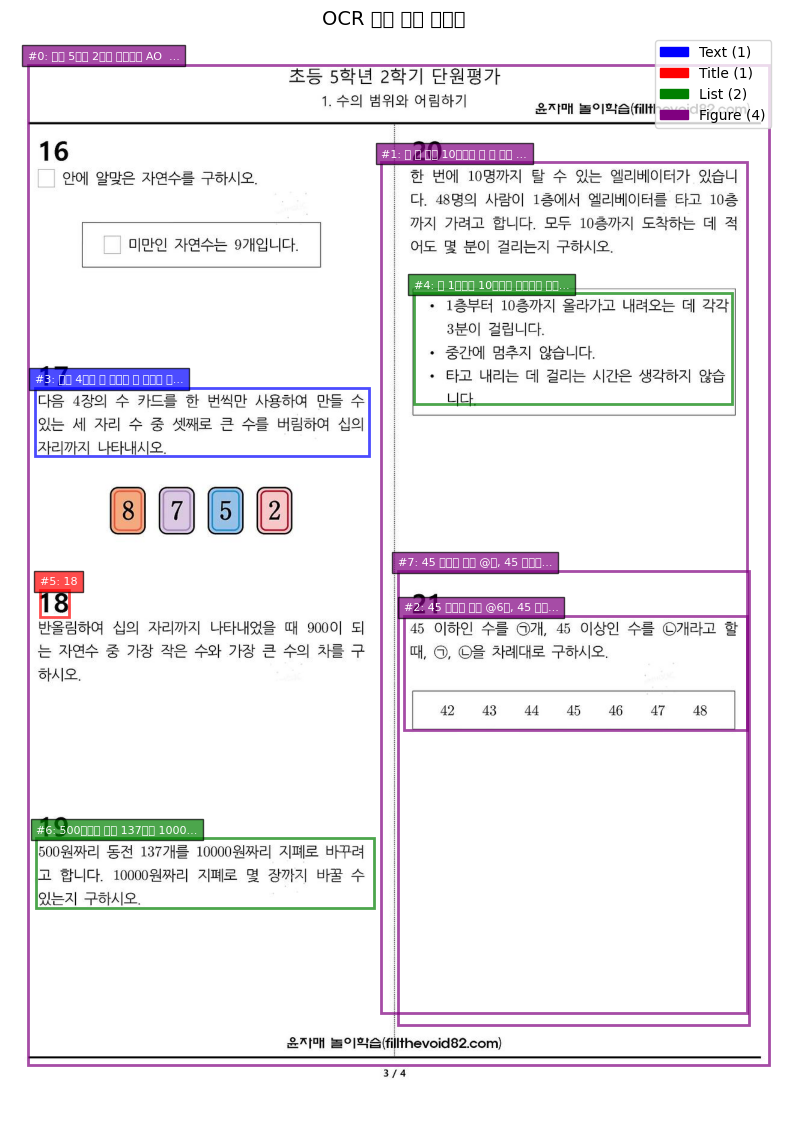

In [38]:
# --- OCR 결과 시각화 및 저장 ---

def visualize_ocr_results(image, ocr_results, output_path=None):
    """OCR 결과를 시각적으로 표시하는 함수"""
    import matplotlib.patches as patches

    # 시각화할 이미지 복사본 생성
    vis_img = image.copy()

    plt.figure(figsize=(16, 14))
    plt.imshow(vis_img)

    # 각 요소별 색상 정의
    colors = {
        "Text": 'blue',
        "Title": 'red',
        "List": 'green',
        "Table": 'orange',
        "Figure": 'purple'
    }

    # 범례 표시용 패치 생성
    legend_patches = []

    # 모든 요소 유형에 대해 시각화
    for element_type, items in ocr_results.items():
        if not items:  # 빈 목록은 건너뜀
            continue

        color = colors.get(element_type, 'gray')
        legend_patches.append(patches.Patch(color=color, label=f'{element_type} ({len(items)})'))

        # 각 요소 표시
        for item in items:
            x1, y1, x2, y2 = item['coordinates']

            # 박스 그리기
            rect = patches.Rectangle(
                (x1, y1), x2-x1, y2-y1,
                linewidth=2, edgecolor=color, facecolor='none', alpha=0.7
            )
            plt.gca().add_patch(rect)

            # 텍스트가 있으면 ID와 함께 짧게 표시
            if item['text']:
                text_sample = item['text'].replace('\n', ' ')[:20]
                if len(item['text']) > 20:
                    text_sample += '...'
                plt.text(
                    x1, y1-10, f"#{item['id']}: {text_sample}",
                    fontsize=8, color='white', bbox=dict(facecolor=color, alpha=0.7)
                )

    # 범례 추가
    plt.legend(handles=legend_patches, loc='upper right', fontsize=10)
    plt.title("OCR 처리 결과 시각화", fontsize=14)
    plt.axis('off')

    # 이미지 저장 (지정된 경우)
    if output_path:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"OCR 결과 시각화 이미지 저장됨: {output_path}")

    plt.show()
    plt.close()

# OCR 결과 시각화 및 저장
ocr_vis_path = os.path.join(SAVE_DIR, f"{BASE_FILENAME}_OCR_results_faster.png")
visualize_ocr_results(image_rgb, ocr_results, ocr_vis_path)

In [39]:
# --- OCR 결과 텍스트 파일로 저장 ---

def save_ocr_results_to_text(ocr_results, output_path):
    """OCR 결과를 읽기 쉬운 텍스트 파일로 저장"""
    try:
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(f"=== OCR 결과 요약 ===\n")
            f.write(f"처리 시간: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

            # 각 요소 유형별로 결과 저장
            for element_type, items in ocr_results.items():
                if not items:  # 빈 목록은 건너뜀
                    continue

                f.write(f"\n--- {element_type} ({len(items)}개) ---\n\n")

                for idx, item in enumerate(items, 1):
                    f.write(f"[{element_type} #{idx}] 신뢰도: {item['score']:.2f}\n")
                    f.write(f"좌표: {item['coordinates']}\n")
                    f.write(f"텍스트:\n{item['text']}\n")
                    f.write("-" * 50 + "\n")

        print(f"OCR 결과가 텍스트 파일로 저장됨: {output_path}")
        return True
    except Exception as e:
        print(f"OCR 결과 저장 중 오류 발생: {e}")
        return False

# OCR 결과 텍스트 파일로 저장
ocr_text_path = os.path.join(SAVE_DIR, f"{BASE_FILENAME}_OCR_results_faster.txt")
save_ocr_results_to_text(ocr_results, ocr_text_path)

OCR 결과가 텍스트 파일로 저장됨: /content/drive/MyDrive/layout_results/학습지_OCR_results_faster.txt


True